In [1]:
import codecs
import numpy as np
import pandas as pd

%matplotlib inline
import matplotlib.pyplot as plt

In [2]:
yyyymmdd = '20180227'

game_record_file = 'game_record_' + yyyymmdd + '.csv'
game_record_small_file = 'game_record_small_' + yyyymmdd + '.csv'

with codecs.open(game_record_file, 'r', 'utf-8', 'ignore') as file:
    game_record = pd.read_table(file, delimiter=',', dtype='str')

with codecs.open(game_record_small_file, 'r', 'utf-8', 'ignore') as file:
    game_record_small = pd.read_table(file, delimiter=',', dtype='str')

In [33]:
# 手数（全体）
move = [len(str(record)) // 2 for record in game_record['game_record']]

pd.options.display.float_format = '{:,.1f}'.format
print(pd.DataFrame(move).describe())

                0
count 1,092,583.0
mean         36.0
std          19.7
min           1.0
25%          23.0
50%          32.0
75%          45.0
max         225.0


In [34]:
# 手数（サンプリング）
move_sample = [len(str(record)) // 2 for record in game_record_small['game_record']]

print(pd.DataFrame(move_sample).describe())

            0
count 1,000.0
mean     36.1
std      19.5
min       1.0
25%      23.0
50%      33.0
75%      45.0
max     140.0


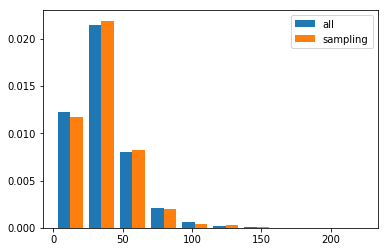

In [32]:
# 手数：グラフ
labels = ['all', 'sampling']

plt.hist([move, move_sample], label=labels, stacked=False, normed=True)
plt.legend()
plt.show()

game_end_status
AgreedDraw    2.45
Resign       87.90
Timeup        9.65
Unknown       0.00
dtype: float64


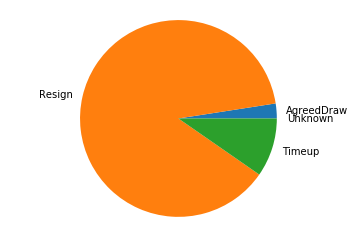

In [61]:
# 終了ステータス（全体）
end_status = game_record.groupby(['game_end_status']).size()
game_count = sum(end_status)

plt.pie(end_status, labels=end_status.index)
plt.axis('equal')
print(100 * end_status / game_count)

game_end_status
AgreedDraw    2.90
Resign       88.10
Timeup        9.00
dtype: float64


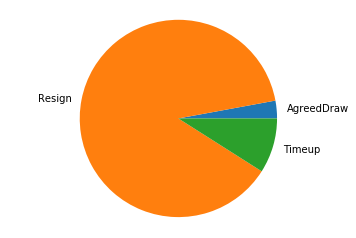

In [63]:
# 終了ステータス（サンプリング）
end_status = game_record_small.groupby(['game_end_status']).size()
game_count = sum(end_status)

plt.pie(end_status, labels=end_status.index)
plt.axis('equal')
print(100 * end_status / game_count)

game_result
BlackWin   49.45
Draw        2.45
WhiteWin   48.10
dtype: float64


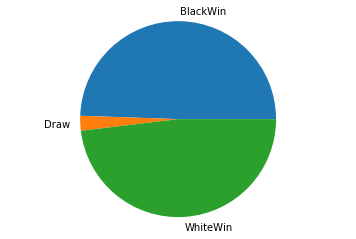

In [64]:
# 結果（全体）
game_result = game_record.groupby(['game_result']).size()

if 'Unknown' in game_result.index:
    game_result = game_result.drop('Unknown')

game_count = sum(game_result)

plt.pie(game_result, labels=game_result.index)
plt.axis('equal')

pd.options.display.float_format = '{:,.2f}'.format
print(100 * game_result / game_count)

game_result
BlackWin   50.40
Draw        2.90
WhiteWin   46.70
dtype: float64


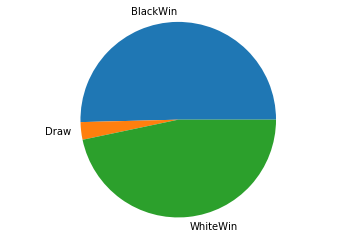

In [65]:
# 結果（サンプリング）
game_result = game_record_small.groupby(['game_result']).size()

if 'Unknown' in game_result.index:
    game_result = game_result.drop('Unknown')

game_count = sum(game_result)

plt.pie(game_result, labels=game_result.index)
plt.axis('equal')
print(100 * game_result / game_count)